In [2]:
#Import of used Packages
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
p4 = pd.read_csv("../UE_Motion_Capture/data_export/walking_music_P4_pos.tsv",delimiter="\t",usecols=["RHeel_pos_Z","LHeel_pos_Z"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21af7278090>,
 'caps': [<matplotlib.lines.Line2D at 0x21af7279850>,
 'boxes': [<matplotlib.lines.Line2D at 0x21af6de2790>],
 'medians': [<matplotlib.lines.Line2D at 0x21af727b090>],
 'fliers': [<matplotlib.lines.Line2D at 0x21af727bb10>],
 'means': []}

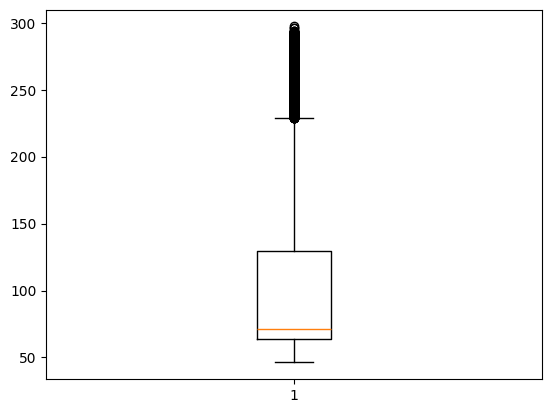

In [7]:
plt.boxplot(p4["RHeel_pos_Z"])

In [243]:
#Calculation of right foot steps
Rsteps = []
frame = 0
bValley = False
for index, values in p4.iterrows():
    RValue = values["RHeel_pos_Z"]
    if frame < 150:
        frame += 1
        continue
    if RValue < 70:
        bValley = False
        for i in range(1,80):
            if frame == 161:
                breakpoint()
            before = p4.loc[frame-i,"RHeel_pos_Z"]
            next = p4.loc[frame+i,"RHeel_pos_Z"]
            if (RValue <= before) and (RValue <= next):
                bValley = True
            else:
                bValley = False
                break
        if bValley:
            print("R - ", frame, ": ", RValue)
            Rsteps.append([frame,RValue])
    frame += 1

R -  161 :  61.764
R -  268 :  49.075
R -  391 :  51.675
R -  511 :  48.273
R -  629 :  48.318
R -  745 :  53.309
R -  864 :  56.827
R -  981 :  59.905
R -  1099 :  56.811
R -  1220 :  56.098
R -  1337 :  51.361
R -  1454 :  47.523
R -  1571 :  51.104
R -  1687 :  48.548
R -  1802 :  50.829
R -  1917 :  54.288
R -  2032 :  56.71
R -  2145 :  61.196
R -  2260 :  57.563
R -  2377 :  57.183
R -  2490 :  53.194
R -  2598 :  52.661
R -  2708 :  51.083
R -  2835 :  51.085
R -  2978 :  48.215
R -  3120 :  54.699
R -  3255 :  56.862
R -  3391 :  59.544
R -  3525 :  60.018
R -  3659 :  58.259
R -  3793 :  55.969
R -  3929 :  49.199
R -  4063 :  49.409
R -  4201 :  49.696
R -  4335 :  48.804
R -  4468 :  54.495
R -  4599 :  56.331
R -  4727 :  58.276
R -  4858 :  59.638
R -  4985 :  58.707
R -  5112 :  55.84
R -  5235 :  52.328
R -  5361 :  49.398
R -  5519 :  51.05
R -  5683 :  46.646
R -  5828 :  54.756
R -  5974 :  57.019
R -  6126 :  58.044
R -  6271 :  59.723
R -  6419 :  57.369
R -  6572 :

KeyError: 9740

In [244]:
#Calculation of left foot steps
LSteps = []
frame = 0
for index, values in p4.iterrows():
    LValue = values["LHeel_pos_Z"]
    if frame < 150:
        frame += 1
        continue
    if LValue < 70:
        for i in range(1,80):
            before = p4.loc[frame-i,"LHeel_pos_Z"]
            next = p4.loc[frame+i,"LHeel_pos_Z"]
            if (LValue <= before) and (LValue <= next):
                bValley = True
            else:
                bValley = False
                break
        if bValley:
            print("L - ", frame, ": ", LValue)
            LSteps.append([frame,LValue])
    frame += 1

L -  206 :  60.482
L -  330 :  54.845
L -  451 :  54.107
L -  571 :  51.313
L -  689 :  53.973
L -  805 :  60.714
L -  921 :  63.345
L -  1041 :  61.981
L -  1161 :  63.257
L -  1280 :  58.501
L -  1396 :  53.647
L -  1513 :  55.138
L -  1629 :  52.662
L -  1745 :  53.047
L -  1860 :  56.717
L -  1975 :  60.689
L -  2088 :  64.406
L -  2204 :  61.865
L -  2319 :  61.153
L -  2434 :  58.695
L -  2546 :  56.075
L -  2649 :  56.335
L -  2769 :  56.475
L -  2906 :  51.955
L -  3052 :  53.673
L -  3188 :  60.144
L -  3325 :  63.025
L -  3458 :  61.739
L -  3592 :  63.17
L -  3729 :  60.531
L -  3862 :  56.809
L -  3996 :  52.187
L -  4133 :  54.97
L -  4269 :  52.426
L -  4404 :  54.69
L -  4536 :  61.231
L -  4664 :  62.388
L -  4794 :  62.648
L -  4922 :  60.94
L -  5051 :  60.88
L -  5175 :  58.461
L -  5296 :  51.698
L -  5441 :  55.267
L -  5604 :  51.223
L -  5758 :  53.357
L -  5903 :  58.783
L -  6050 :  60.976
L -  6202 :  65.562
L -  6345 :  62.771
L -  6496 :  62.249
L -  6648 : 

KeyError: 9740

In [252]:
#Combination of steps
steps = LSteps + Rsteps
steps.sort()

In [253]:
steps = pd.DataFrame(steps)
steps

,0,1
0,161,61.764
1,206,60.482
2,268,49.075
3,330,54.845
4,391,51.675
...,...,...
142,9399,51.175
143,9465,51.691
144,9529,49.654
145,9593,56.556


In [274]:
m1 = pd.read_csv("../UE_Motion_Capture/music/export_big_john.txt",delimiter="\t", header=None)
m2 = pd.read_csv("../UE_Motion_Capture/music/export_berlioz.txt",delimiter="\t", header=None)
m3 = pd.read_csv("../UE_Motion_Capture/music/export_wombats.txt",delimiter="\t", header=None)

In [275]:
#delete first row
m1 = m1.drop(index=0)
m2 = m2.drop(index=0)
m3 = m3.drop(index=0)

In [276]:
start_music = pd.read_csv("../UE_Motion_Capture/start_of_music.csv",delimiter="\t", header=None)

In [277]:
start_music[start_music[0]=='P4_M2'][1].item()

5100.0

In [278]:
#Update TIme Values, to frames, to starting_time 
m1[0] = (m1[0]*100)+start_music[start_music[0]=='P4_M1'][1].item()
m2[0] = (m2[0]*100)+start_music[start_music[0]=='P4_M2'][1].item()
m3[0] = (m3[0]*100)+start_music[start_music[0]=='P4_M3'][1].item()

In [281]:
m2

,0,1
1,5285.179138,80.7495BPM
2,5359.482993,80.7495BPM
3,5433.786848,80.7495BPM
4,5508.090703,80.7495BPM
5,5584.716553,78.3026BPM
6,5660.181406,79.5072BPM
7,5735.646258,79.5072BPM
8,5811.111111,79.5072BPM
9,5884.253968,82.0313BPM
10,5958.557823,80.7495BPM


(0.0, 9800.0)

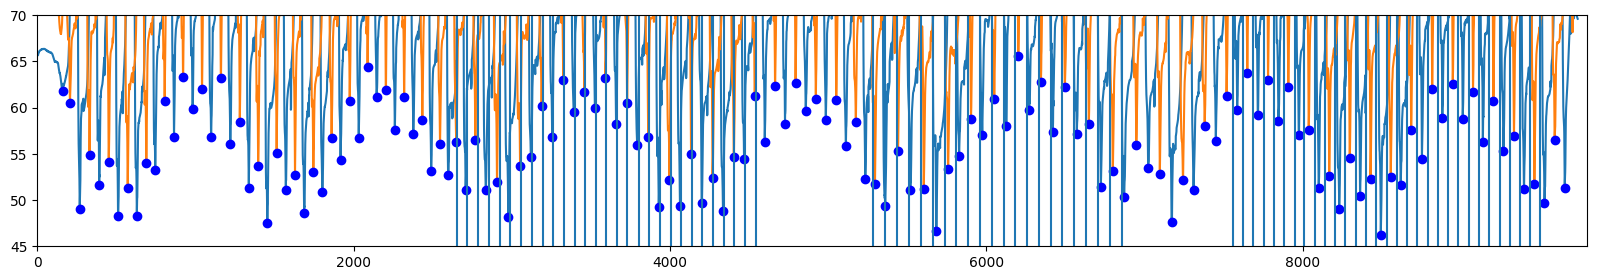

In [287]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m1[0],0,500)
plt.vlines(m2[0],0,500)
plt.vlines(m3[0],0,500)
plt.ylim([45, 70])
plt.xlim([0, 9800])

In [299]:
start = m1[0].min()
end = m1[0].max()

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

88.82941988586032

In [300]:
#ersten 5 Sekunden
start = m1[0].min()
end = m1[0].min()+500

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

84.0

In [309]:
m1_start = m1[0].min()
m1_end = m1[0].max()
print(m1_start)
print(m1_end)

2650.3492063
4541.6145125


In [318]:
beats_in_m1_range = m1[(m1[0]>=m1_start) & (m1[0]<=m1_end)][0] 
steps_in_m1_range = steps.loc[(steps[0] >= m1_start) & (steps[0] <= m1_end)][0]

In [320]:
#all MUSIC M1
beats_in_m1_range.count()/((beats_in_m1_range.max()-beats_in_m1_range.min())/100/60)

92.00189916749818

In [319]:
#all WALKING M1
steps_in_m1_range.count()/((steps_in_m1_range.max()-steps_in_m1_range.min())/100/60)

91.90371991247264

In [321]:
after3W = steps_in_m1_range[steps_in_m1_range >= steps_in_m1_range.min()+300]

In [322]:
after3M = beats_in_m1_range[beats_in_m1_range >= beats_in_m1_range.min()+300]

In [323]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100/60)

92.99191374663073

In [324]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100/60)

92.7683246045788

In [327]:
from statistics import mean
mean(abs(x - y) for x, y in zip(beats_in_m1_range, steps_in_m1_range))

59.73947198571435

In [328]:
from sklearn.metrics import mean_squared_error 
  
# Calculation of Mean Squared Error (MSE) 
mean_squared_error(beats_in_m1_range,steps_in_m1_range) 

ValueError: Found input variables with inconsistent numbers of samples: [29, 28]

(2630.3492063, 4561.6145125)

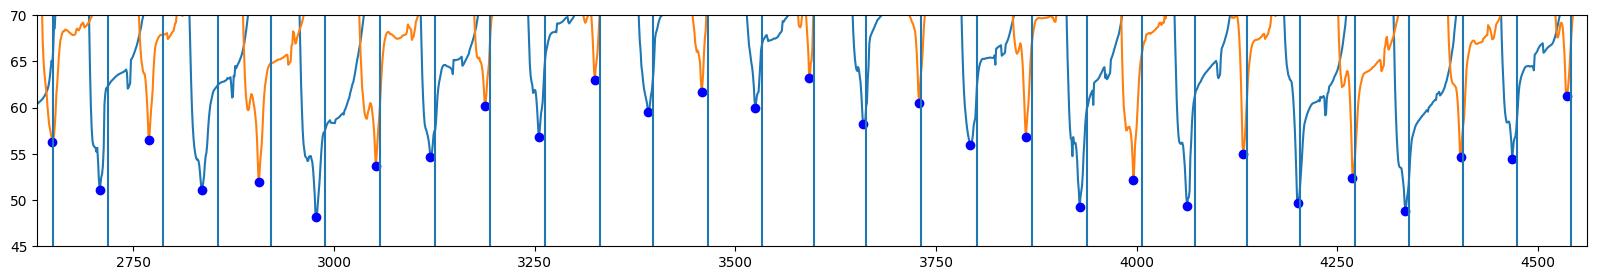

In [331]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m1[0],0,500)
plt.ylim([45, 70])
plt.xlim([m1_start-20, m1_end+20])